In [ ]:
#https://snowdeer.github.io/machine-learning/2018/01/10/convolution-neural-network/

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import os
import numpy

In [4]:
MODEL_SAVE_FOLDER_PATH = './model/'

if not os.path.exists(MODEL_SAVE_FOLDER_PATH):
  os.mkdir(MODEL_SAVE_FOLDER_PATH)

model_path = MODEL_SAVE_FOLDER_PATH + 'mnist-' + '{epoch:02d}-{val_loss:.4f}.hdf5'

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                                verbose=1, save_best_only=True)

cb_early_stopping = EarlyStopping(monitor='val_loss', patience=10)

(X_train, Y_train), (X_validation, Y_validation) = mnist.load_data()
print('X_train:', X_train[0])

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
print('X_train.shape:', X_train.shape)
print('X_train[0]:', X_train[0])
X_validation = X_validation.reshape(X_validation.shape[0], 28, 28, 1).astype('float32') / 255

Y_train = np_utils.to_categorical(Y_train, 10)
print('Y_train.shape:', Y_train.shape)
print('Y_train[0]:', Y_train[0])
Y_validation = np_utils.to_categorical(Y_validation, 10)


X_train: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 2

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [6]:
history = model.fit(X_train, Y_train,
                    validation_data=(X_validation, Y_validation),
                    epochs=3, batch_size=200, verbose=0,
                    callbacks=[cb_checkpoint, cb_early_stopping])

print('\nAccuracy: {:.4f}'.format(model.evaluate(X_validation, Y_validation)[1]))


Epoch 00001: val_loss improved from inf to 0.05755, saving model to ./model/mnist-01-0.0575.hdf5

Epoch 00002: val_loss improved from 0.05755 to 0.04337, saving model to ./model/mnist-02-0.0434.hdf5

Epoch 00003: val_loss improved from 0.04337 to 0.03423, saving model to ./model/mnist-03-0.0342.hdf5
313/313 [==============================] - 1s 2ms/step - loss: 0.0342 - accuracy: 0.9884

Accuracy: 0.9884


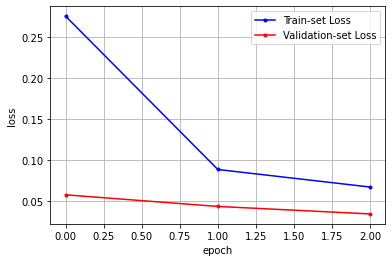

In [7]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()